<a href="https://colab.research.google.com/github/Matheus-Homem/international_bank_marketing/blob/main/notebooks/c3_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Imports

## 0.1. Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
!pip install -U yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn import preprocessing as pp
from sklearn import metrics as m
from plotly import express as px
!pip install umap-learn
import umap.umap_ as umap

     |████████████████████████████████| 271 kB 7.6 MB/s 
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1
     |████████████████████████████████| 86 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 18.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=3d2e8830a2e7d3cc77212d5bd7ad1c00fb7d0bd445426958c84aaf632ce74d65
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=4451306cf5a8ef2c28d407e901447ada5cf9d1d59a80c8380ca1b0cdac22b7b6
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


## 0.2. Load Dataset

In [2]:
df = pd.read_csv('https://github.com/Matheus-Homem/international_bank_marketing/raw/main/data/CC%20GENERAL.csv')

In [3]:
df.sample().T

,4886
CUST_ID,C15021
BALANCE,8.57099
BALANCE_FREQUENCY,0.272727
PURCHASES,149.55
ONEOFF_PURCHASES,149.55
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0


# 1. Data Description

In [4]:
df1 = df.copy()

## 1.1. Rename Columns

In [5]:
df1.columns = list(map(lambda x: x.lower(), df1.columns))

## 1.2. Data Dimensions

In [6]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 8950
Number of columns: 18


## 1.3. Data Types

In [7]:
df1.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## 1.4. Check NA

In [8]:
df1.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [9]:
df1['credit_limit'].fillna(df1['credit_limit'].min(),inplace=True)

In [10]:
df1['minimum_payments'].fillna(0,inplace=True)

## 1.5. Replace NA

In [11]:
# remove NA
df1.dropna(inplace=True)
print('Number of rows: {}'.format(df1.shape[0]))
print('Removed data: {:.2f}%'.format(1-(df1.shape[0]/df.shape[0])))

Number of rows: 8950
Removed data: 0.00%


## 1.6. Change dtypes

In [12]:
df1['cust_id'] = df1['cust_id'].map(lambda x: x[1:]).astype(int)

## 1.7. Descriptive Statistics

In [ ]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [ ]:
# Central Tendency -> Mean, Median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion -> Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['Attributes','Min','Max','Range','Mean','Median','Std','Skew','Kurtosis']
m

,Attributes,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,cust_id,10001.0,19190.00000,9189.00000,14600.040670,14598.500000,2651.157754,-0.000828,-1.199260
1,balance,0.0,19043.13856,19043.13856,1564.474828,873.385231,2081.415590,2.393386,7.674751
2,balance_frequency,0.0,1.00000,1.00000,0.877271,1.000000,0.236891,-2.023266,3.092370
3,purchases,0.0,49039.57000,49039.57000,1003.204834,361.280000,2136.515413,8.144269,111.388771
4,oneoff_purchases,0.0,40761.25000,40761.25000,592.437371,38.000000,1659.795184,10.045083,164.187572
5,installments_purchases,0.0,22500.00000,22500.00000,411.067645,89.000000,904.287592,7.299120,96.575178
6,cash_advance,0.0,47137.21176,47137.21176,978.871112,0.000000,2097.046713,5.166609,52.899434
7,purchases_frequency,0.0,1.00000,1.00000,0.490351,0.500000,0.401348,0.060164,-1.638631
8,oneoff_purchases_frequency,0.0,1.00000,1.00000,0.202458,0.083333,0.298319,1.535613,1.161846
9,purchases_installments_frequency,0.0,1.00000,1.00000,0.364437,0.166667,0.397426,0.509201,-1.398632


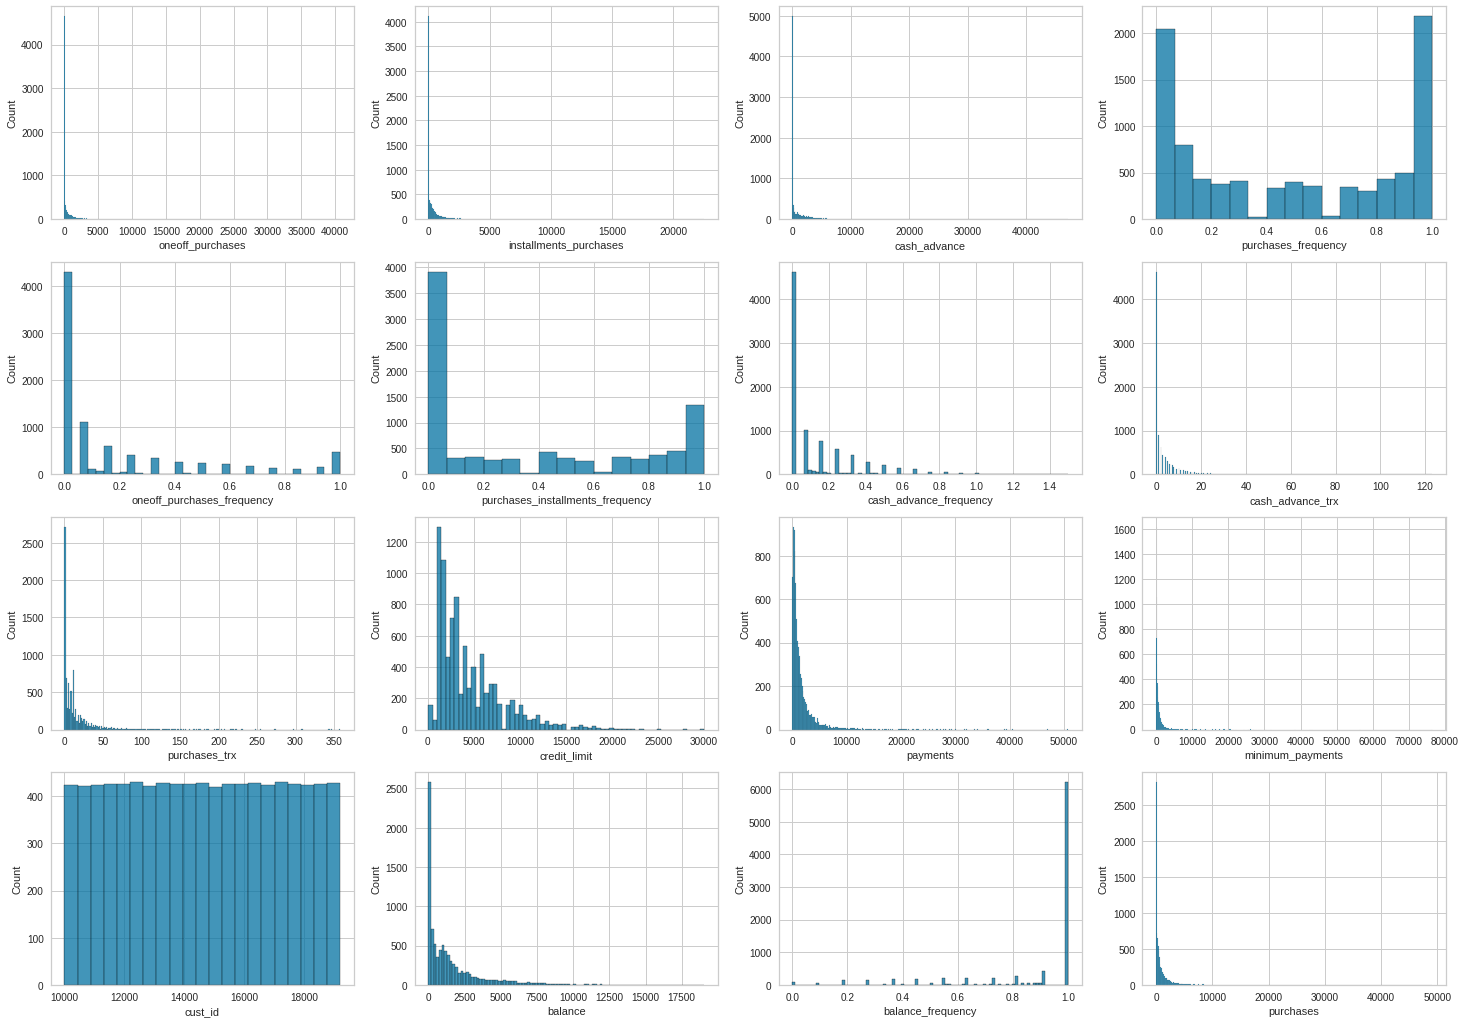

In [ ]:
fig, ax = plt.subplots(4,4,figsize=(25,18))
features = num_attributes.drop('tenure',axis=1).columns
for k in range(16):
  q, mod = divmod(k,4)
  sns.histplot(data=df1,x=features[k],ax=ax[q-1][mod])

# 2. Feature Filtering

In [32]:
df2 = df1.copy()

In [33]:
# Filtering three lines that put number of transactions equal to 0 and transaction value different from 0
df2 = df2[~((df1['purchases_trx']==0) & (df1['purchases']!=0))]

# 3. Feature Engineering

In [34]:
df3 = df2.copy()

## 3.1. Feature Creation

In [35]:
df3.sample(5).T

,1109,756,4387,1000,8923
cust_id,11146.000000,10784.000000,14510.000000,11034.000000,19164.000000
balance,8115.039014,2830.364475,2070.627593,2022.469335,486.661842
balance_frequency,1.000000,1.000000,1.000000,1.000000,0.833333
purchases,383.420000,1412.760000,2564.080000,22.500000,1898.880000
oneoff_purchases,0.000000,0.000000,1165.000000,0.000000,939.090000
installments_purchases,383.420000,1412.760000,1399.080000,22.500000,959.790000
cash_advance,0.000000,2045.094842,0.000000,0.000000,0.000000
purchases_frequency,0.500000,1.000000,1.000000,0.416667,0.833333
oneoff_purchases_frequency,0.000000,0.000000,0.583333,0.000000,0.666667
purchases_installments_frequency,0.416667,1.000000,1.000000,0.416667,0.666667


In [36]:
df_ref = df3[['cust_id',
              'oneoff_purchases',
              'installments_purchases',
              'oneoff_purchases_frequency',
              'purchases_installments_frequency',
              'purchases_trx']].copy()

df_ref.sample(5).T

,6378,3090,396,7462,5288
cust_id,16553.000000,13180.00,10410.00,17665.000000,15437.000000
oneoff_purchases,159.070000,854.20,5.00,243.230000,0.000000
installments_purchases,0.000000,0.00,250.12,180.000000,574.750000
oneoff_purchases_frequency,0.166667,0.25,0.25,0.111111,0.000000
purchases_installments_frequency,0.000000,0.00,0.50,0.888889,0.909091
purchases_trx,2.000000,3.00,11.00,10.000000,11.000000


# 4. EDA (Exploratory Data Analysis)

In [37]:
df4 = df_ref.copy()

# 5. Data Preparation

In [61]:
df5 = df4.copy()

In [62]:
df5.head()

,cust_id,oneoff_purchases,installments_purchases,oneoff_purchases_frequency,purchases_installments_frequency,purchases_trx
0,10001,0.00,95.4,0.000000,0.083333,2
1,10002,0.00,0.0,0.000000,0.000000,0
2,10003,773.17,0.0,1.000000,0.000000,12
3,10004,1499.00,0.0,0.083333,0.000000,1
4,10005,16.00,0.0,0.083333,0.000000,1


In [63]:
## Standard Scaler
ss = pp.StandardScaler()

df5['oneoff_purchases_frequency'] = ss.fit_transform(df5[['oneoff_purchases_frequency']])
df5['oneoff_purchases'] = ss.fit_transform(df5[['oneoff_purchases']])
df5['installments_purchases'] = ss.fit_transform(df5[['installments_purchases']])
df5['purchases_trx'] = ss.fit_transform(df5[['purchases_trx']])
df5['purchases_installments_frequency'] = ss.fit_transform(df5[['purchases_installments_frequency']])

# 6. Feature Selection

In [64]:
df6 = df5.copy()

# 7. Hyperparameter Fine-Tunning

In [65]:
X = df6.drop('cust_id',axis=1)

In [86]:
clusters = [2,3,4,5,6,7,8,9]

In [87]:
model = KMeans(random_state=101)

## 7.1. Within-Cluster Sum of Square (WSS)

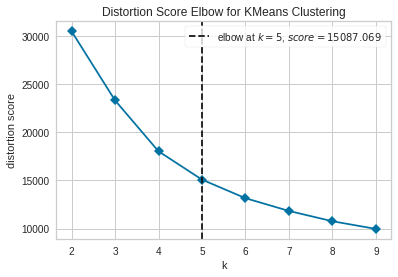

In [88]:
kmeans = KElbowVisualizer(model,k=clusters, metric='distortion',timings=False,random_state=101)
kmeans.fit(X)
kmeans.show()

## 7.2. Sillhouette Score

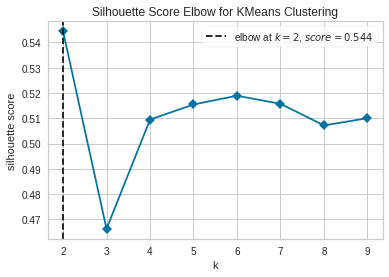

In [89]:
kmeans = KElbowVisualizer(model,k=clusters, metric='silhouette',timings=False,random_state=101)
kmeans.fit(X)
kmeans.show()

### 7.2.1. Silhouette Analysis

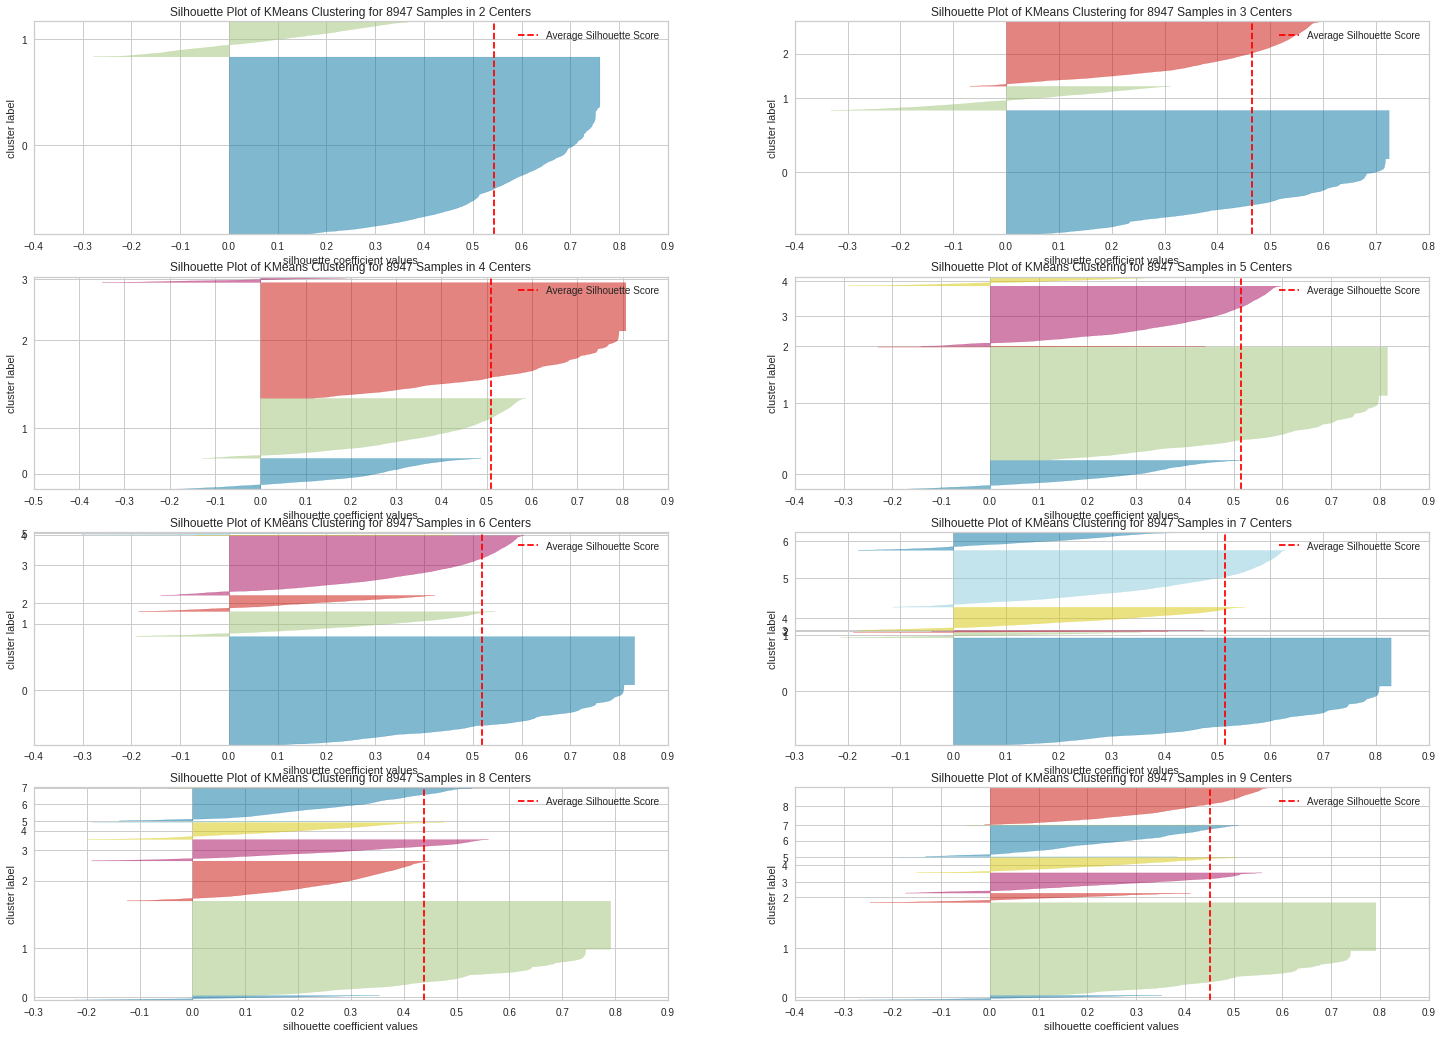

In [90]:
fig, ax = plt.subplots(4,2,figsize=(25,18))

for k in clusters:
  km = KMeans(n_clusters=k,init='random',n_init=10,max_iter=100,random_state=101)
  q, mod = divmod(k,2)

  visualizer = SilhouetteVisualizer(km,colors='yellowbrick',ax=ax[q-1][mod])
  visualizer.fit(X)
  visualizer.finalize()

## 7.3. Davies Bouldin Score

In [91]:
davies_list = []

for k in clusters:
  # model definition
  kmeans_model = KMeans(n_clusters=k,random_state=101)

  # model training
  kmeans_model.fit(X)

  # model predict
  labels = kmeans_model.predict(X)

  # model performance
  dav = m.davies_bouldin_score(X, labels)

  davies_list.append(dav)

Text(0, 0.5, 'Davies Boulding Score')

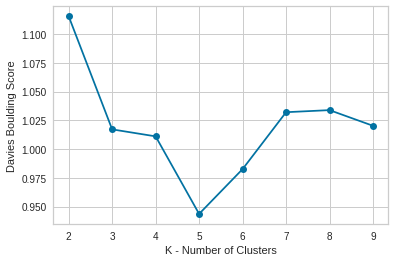

In [92]:
plt.plot(clusters, davies_list,marker='o')
plt.xlabel('K - Number of Clusters')
plt.ylabel('Davies Boulding Score')

# 8. Model Training

## 8.1. K-Means

In [93]:
# Model Definition
k = 6
kmeans = KMeans(init='random',n_clusters=k,random_state=101)

# Model Training
kmeans.fit(X)

# Clustering
labels = kmeans.labels_

## 8.2. Cluster Validation

In [94]:
# WWS (Within-Cluster Sum of Square)
print('WWS value: {:.2f}'.format(kmeans.inertia_))

# SS (Silhouette Score)
print('SS value: {:.2f}'.format(m.silhouette_score(X,labels)))

# Davies Bouldin Score
print('Davies Boulding Score: {:.2f}'.format(davies_list[1]))

WWS value: 13167.35
SS value: 0.52
Davies Boulding Score: 1.02


# 9. Cluster Analysis

In [100]:
df9 = df3[['cust_id',
           'oneoff_purchases',
           'installments_purchases',
           'oneoff_purchases_frequency',
           'purchases_installments_frequency',
           'purchases_trx']].copy()
df9['cluster'] = labels
df9.head()

,cust_id,oneoff_purchases,installments_purchases,oneoff_purchases_frequency,purchases_installments_frequency,purchases_trx,cluster
0,10001,0.00,95.4,0.000000,0.083333,2,0
1,10002,0.00,0.0,0.000000,0.000000,0,0
2,10003,773.17,0.0,1.000000,0.000000,12,1
3,10004,1499.00,0.0,0.083333,0.000000,1,0
4,10005,16.00,0.0,0.083333,0.000000,1,0


## 9.1. Two-Dimentions Plot

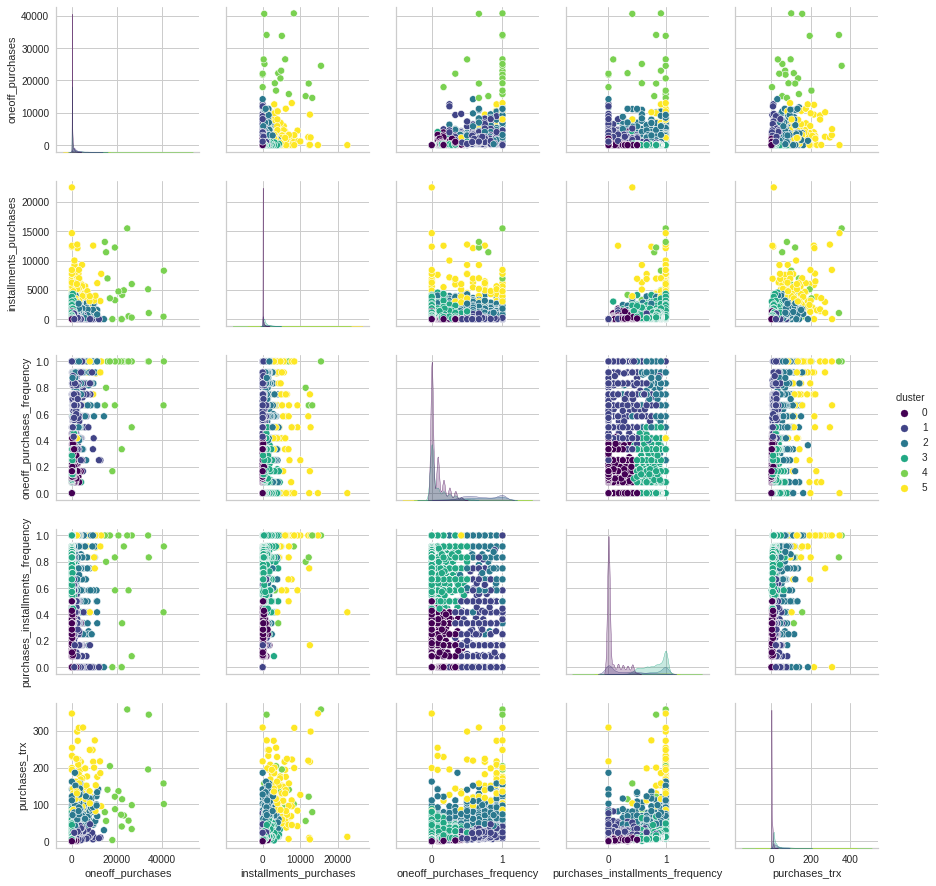

In [101]:
df_viz = df9.drop('cust_id',axis=1)
sns.pairplot(df_viz,hue='cluster',palette='viridis')

## 9.2. UMAP

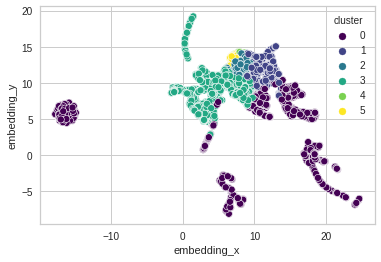

In [102]:
# Quciker from larger datasets but more difficult to visualize
# Change n_neighbors to see something similar to a local structure (\/) ou global structure (/\)
reducer = umap.UMAP(n_neighbors=20,random_state=101)
embedding = reducer.fit_transform(X)

# Embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# Plot UMAP
sns.scatterplot(x='embedding_x',y='embedding_y',data=df_viz,hue='cluster',palette='viridis')

## 9.3. t-SNE

## 9.4. Cluster Profile

In [104]:
df9.columns.tolist()[1:-1]

['oneoff_purchases',
 'installments_purchases',
 'oneoff_purchases_frequency',
 'purchases_installments_frequency',
 'purchases_trx']

In [105]:
df_cluster = df9[['cust_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = round(100*(df_cluster['cust_id']/df_cluster['cust_id'].sum()),2)

for feature in df9.columns.tolist()[1:-1]:
  df_aux = df9[[feature,'cluster']].groupby('cluster').mean().reset_index()
  df_cluster = pd.merge(df_cluster,df_aux, how='inner',on='cluster')

In [106]:
df_cluster

,cluster,cust_id,perc_customer,oneoff_purchases,installments_purchases,oneoff_purchases_frequency,purchases_installments_frequency,purchases_trx
0,0,4585,51.25,163.640192,50.517815,0.065895,0.066506,2.258451
1,1,1048,11.71,1471.134351,160.849866,0.712327,0.199573,19.650763
2,2,678,7.58,2553.963923,1374.243142,0.721000,0.865740,61.358407
3,3,2521,28.18,179.444268,688.564439,0.078958,0.817084,17.290361
4,4,20,0.22,24021.496000,5074.219500,0.840000,0.665000,123.150000
5,5,95,1.06,3640.828316,5357.478632,0.616587,0.909569,137.378947


### Cluster 01 (⭐⭐⭐⭐⭐)
- Number of Customers: **105** (1.17% of customers)
- Frequency of Purchases (from 0 to 1): **0.95**
- Number of Purchases Transactions Made: **146**
- Amount of Money Owned to Credit Card Company: **$4543.53**
- Amount of Purchases made from Account: **13741**

### Cluster 02 (⭐⭐⭐⭐)
- Number of Customers: **1086** (12.13% of customers)
- Frequency of Purchases (from 0 to 1): **0.94**
- Number of Purchases Transactions Made: **51**
- Amount of Money Owned to Credit Card Company: **$1687.53**
- Amount of Purchases made from Account: **3318**

### Cluster 03 (⭐⭐⭐)
- Number of Customers: **1057** (11.81% of customers)
- Frequency of Purchases (from 0 to 1): **0.34**
- Number of Purchases Transactions Made: **9**
- Amount of Money Owned to Credit Card Company: **$5835.46**
- Amount of Purchases made from Account: **709**

### Cluster 04 (⭐⭐)
- Number of Customers: **6702** (74.88% of customers)
- Frequency of Purchases (from 0 to 1): **0.43**
- Number of Purchases Transactions Made: **7**
- Amount of Money Owned to Credit Card Company: **$824.26**
- Amount of Purchases made from Account: **474**

# 10. Deploy to Production